In [69]:
import duckdb
import statistics
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [70]:
#read data
data = pd.read_csv('../adult/discrete.csv')
columns = [col for col in data]
columns.pop(0)
size = len(data[columns[0]])
print(size)
min={}
max={}
for col in columns:
    min[col] = data[col].min()
    max[col] = data[col].max()

print(columns)
print(min)
print(max)


48842
['age', 'workclass', 'education', 'educationnum', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry']
{'age': 0, 'workclass': 0, 'education': 0, 'educationnum': 0, 'maritalstatus': 0, 'occupation': 0, 'relationship': 0, 'race': 0, 'sex': 0, 'capitalgain': 0, 'capitalloss': 0, 'hoursperweek': 0, 'nativecountry': 0}
{'age': 73, 'workclass': 8, 'education': 15, 'educationnum': 15, 'maritalstatus': 6, 'occupation': 14, 'relationship': 5, 'race': 4, 'sex': 1, 'capitalgain': 122, 'capitalloss': 98, 'hoursperweek': 95, 'nativecountry': 41}


In [71]:
conjuncts = ["or", "and"]
comparators = ["=", "!=", ">", "<", ">=", "<="]

In [72]:
def addExpr(query, i):
    if query != "":
        conj = random.choice(conjuncts)
        query = query + conj + " "

    r = random.randint(1, 100)
    if r < 5:
        query = query + "(" + addFilter("") + ") "
        return addExpr(query, i+1)

    label = random.choice(columns)
    comp = random.choice(comparators)
    val = random.uniform(min[label], max[label])

    query = query + label + " " + comp + " " + str(int(val)) + " "

    r = random.randint(1, 100)
    if r < 10*i:
        return query
    return addExpr(query, i+1)


def addFilter(query):
    r = random.randint(1, 100)
    if r < 10:
        if query == "":
            return "TRUE"
        else:
            return query
    else:
        return addExpr(query, 1)

In [73]:
def generateQuery():
    queryBeginning = "SELECT id FROM data WHERE "
    filter = addFilter("")
    return queryBeginning + filter

In [74]:
con = duckdb.connect(database=':memory:')
con.execute('CREATE TABLE data AS SELECT * FROM read_csv_auto(\'adult/discrete.csv\')')
con.execute('SET threads TO 1')

queries = []
sizes = []

for i in range(0, 10):
    queries.append([])
    sizes.append([])

for i in range(1, 1000000):
    q = generateQuery()
    result = con.execute(q).fetchall()
    l = len(result)
    retSize = l * 10 / size

    index = int(retSize)
    if index == 10:
        index = 9

    if len(queries[index]) < 10000:
        queries[index].append(q)
        sizes[index].append(retSize * 10)


In [75]:
#print to files
for i in range(0, 10):
    f = open("queries/batch1/temp/" + str(i) + "0-" + str(i+1) + "0.txt", "a")
    for q in queries[i]:
        f.write(q)
        f.write("\n")
    f.close()

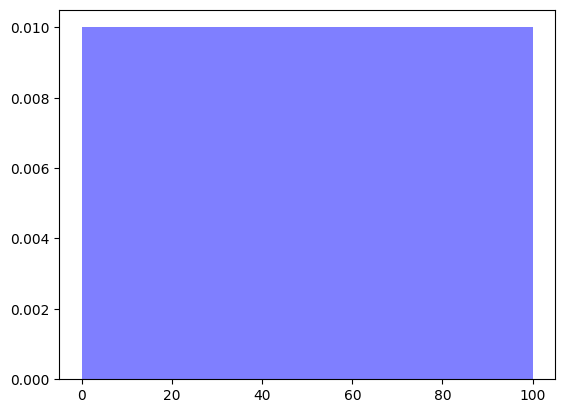

In [76]:
flat_list = [item for sublist in sizes for item in sublist]

plotData = np.array(flat_list)

plt.hist(plotData, 10,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()